In [1]:
# Import required packages
import numpy as np
from scipy import ndimage as ndi
import skimage
import os
import matplotlib.pyplot as plt
import csv
from core_utils import imoverlay
import segmentation

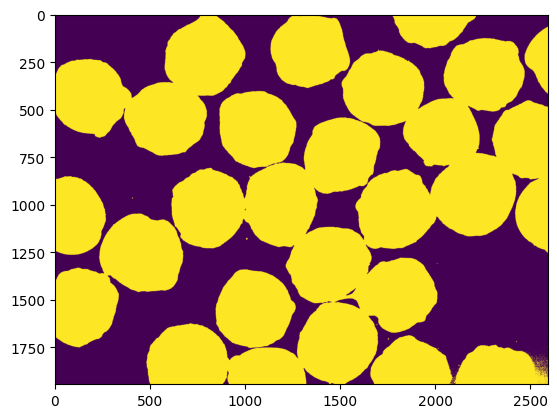

In [2]:
# For testing only

data_directory = '\\\\pn.vai.org\\projects\\wen\\vari-core-generated-data\\OIC\\OIC-234 EB Junwei\\EB8 image'

file = "HET66-2 2X.tif"

image = skimage.io.imread(os.path.join(data_directory, file))
image = skimage.color.rgb2gray(image)

labels, inner_cell_labels = segmentation.segment_cells(image, thresh = 0.95)

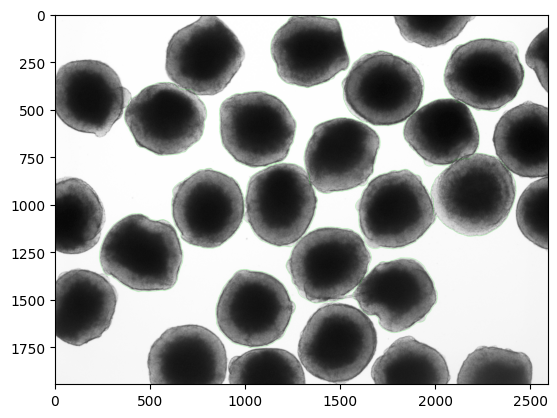

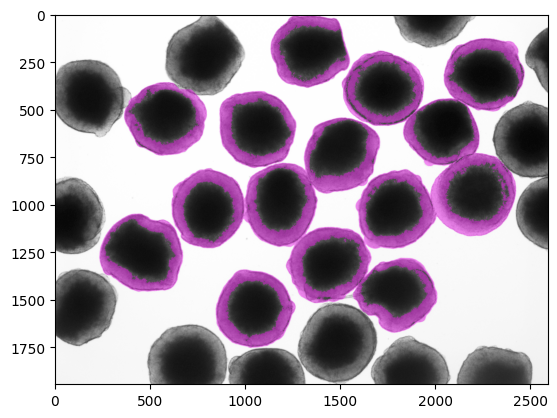

In [3]:
ovimage_cells = imoverlay(image, labels, [0, 1, 0, 0.4])
ovimage_inner = imoverlay(image, inner_cell_labels, [1, 0, 1, 0.4], plot_outlines=False)

plt.figure()
plt.imshow(ovimage_cells)

plt.figure()
plt.imshow(ovimage_inner)

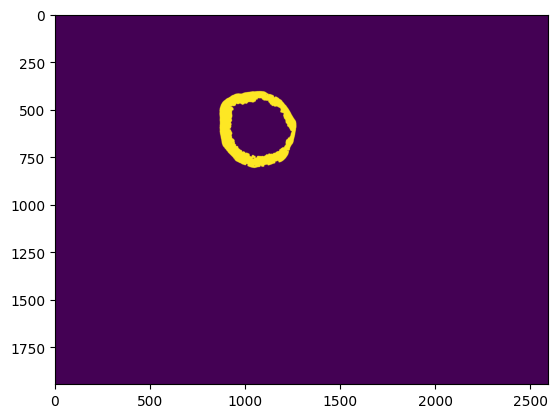

In [18]:
# Grab one of the cells and try to measure the skeleton
curr_inner_mask = np.zeros(inner_cell_labels.shape, dtype=np.bool)
curr_inner_mask[inner_cell_labels == 7] = True

curr_inner_mask = skimage.morphology.binary_opening(curr_inner_mask, skimage.morphology.disk(5))

plt.imshow(curr_inner_mask)


curr_inner_skeleton = skimage.morphology.skeletonize(curr_inner_mask)

# Calculate distance transform
curr_dist = ndi.distance_transform_edt(curr_inner_mask)
# plt.imshow(curr_dist)



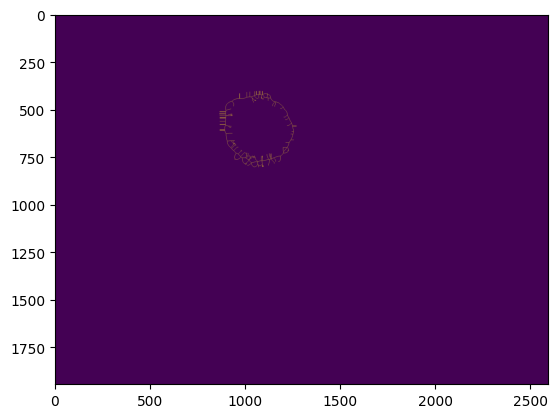

In [19]:
# Compute the medial axis (skeleton) and the distance transform
skel, distance = skimage.morphology.medial_axis(curr_inner_mask, return_distance=True)

plt.imshow(skel)

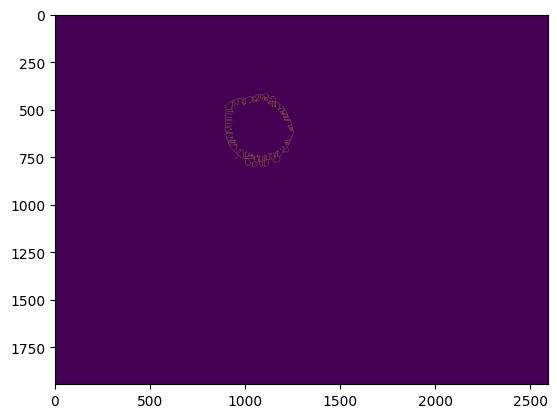

In [14]:
skel = skimage.morphology.thin(curr_inner_mask)

plt.imshow(skel)